In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


# **Creating Imbalanced Dataset**

In [3]:
np.random.seed(123)
n_samples=1000
class_ratio=0.1
n_class_0=int(n_samples*class_ratio)
n_class_1=n_samples-n_class_0

In [ ]:
n_class_0,n_class_1

(100, 900)

In [4]:
#Creating Data Frame
class_0=pd.DataFrame({'f1':np.random.normal(loc=0, scale=1, size=n_class_0),
                      'f2':np.random.normal(loc=0, scale=1, size=n_class_0),
                      'target':[0]*n_class_0})
class_1=pd.DataFrame({'f1':np.random.normal(loc=0, scale=1, size=n_class_1),
                      'f2':np.random.normal(loc=0, scale=1, size=n_class_1),
                      'target':[1]*n_class_1})

In [5]:
df=pd.concat([class_0,class_1])
df.head()

,f1,f2,target
0,-1.085631,0.642055,0
1,0.997345,-1.977888,0
2,0.282978,0.712265,0
3,-1.506295,2.598304,0
4,-0.578600,-0.024626,0


from matplotlib import pyplot as plt
_df_0['f1'].plot(kind='hist', bins=20, title='f1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['f2'].plot(kind='hist', bins=20, title='f2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='f1', y='f2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['f1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('f1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['f2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('f2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['target']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'target'}, axis=1)
              .sort_values('target', ascending=True))
  xs = counted['target']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('target', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['f1'].plot(kind='line', figsize=(8, 4), title='f1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['f2'].plot(kind='line', figsize=(8, 4), title='f2')
plt.gca().spines[['top', 'right']].set_visible(False)

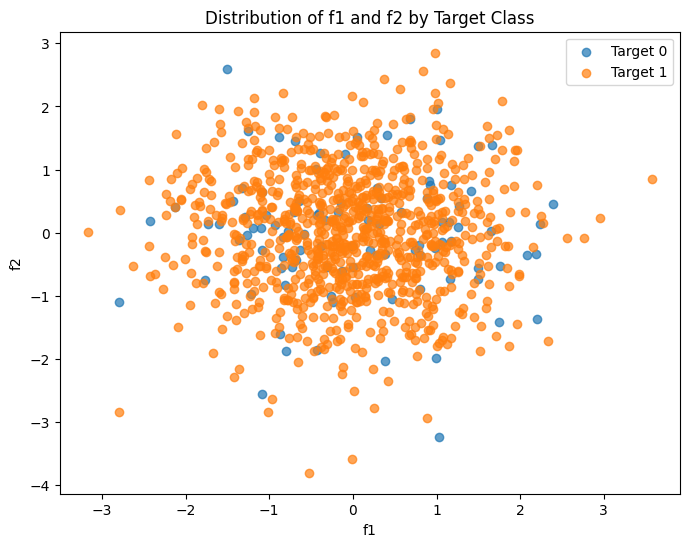

In [21]:
# @title Distribution of f1 and f2 by Target Class

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df[df['target'] == 0]['f1'], df[df['target'] == 0]['f2'], label='Target 0', alpha=0.7)
plt.scatter(df[df['target'] == 1]['f1'], df[df['target'] == 1]['f2'], label='Target 1', alpha=0.7)
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Distribution of f1 and f2 by Target Class')
_ = plt.legend()

In [6]:
df['target'].value_counts()

target
1    900
0    100
Name: count, dtype: int64

# **Upsampling**

In [8]:
df_minority=df[df['target']==0]
df_majority=df[df['target']==1]

In [10]:
#importing resample
from sklearn.utils import resample
df_mainority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=23)

In [12]:
df_mainority_upsampled.shape

(900, 3)

In [13]:
df_upsampled= pd.concat([df_majority,df_mainority_upsampled])

In [14]:
df_upsampled['target'].value_counts()

target
1    900
0    900
Name: count, dtype: int64

# **DownSampling**

In [17]:
from sklearn.utils import resample
df_majority_downsampled= resample(df_majority,replace=False,n_samples=len(df_minority),random_state=23)

In [18]:
df_majority_downsampled.shape

(100, 3)

In [19]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [20]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64